<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n20.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.727660,42.192484,22.071342,48.747979,21.753831,229.493296,207.978193,21.515102
1,0.0,1.0,38.041465,40.789013,48.638133,47.100945,13.680870,198.250426,182.960911,15.289515
2,0.0,2.0,90.173179,48.085738,85.792530,96.683630,20.017069,350.752145,332.437238,18.314907
3,0.0,3.0,34.789349,63.769378,33.484614,40.384370,-0.245583,182.182128,178.420906,3.761222
4,0.0,4.0,22.980770,60.954319,75.432157,49.806257,-3.655860,215.517644,217.277565,-1.759922
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,26.470655,23.439293,94.402231,44.406548,3.131225,201.849952,206.950953,-5.101001
19996,999.0,16.0,69.973749,78.115903,84.913199,44.734342,4.953234,292.690427,285.981612,6.708815
19997,999.0,17.0,89.476710,88.884093,29.373444,31.318665,-12.416003,236.636909,241.047626,-4.410717
19998,999.0,18.0,20.803996,62.420826,54.904837,66.729666,5.956797,220.816122,216.623230,4.192892


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.727660,42.192484,22.071342,48.747979,21.753831,229.493296,207.978193,21.515102
1,0.0,1.0,38.041465,40.789013,48.638133,47.100945,13.680870,198.250426,182.960911,15.289515
2,0.0,2.0,90.173179,48.085738,85.792530,96.683630,20.017069,350.752145,332.437238,18.314907
3,0.0,3.0,34.789349,63.769378,33.484614,40.384370,-0.245583,182.182128,178.420906,3.761222
4,0.0,4.0,22.980770,60.954319,75.432157,49.806257,-3.655860,215.517644,217.277565,-1.759922
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,26.470655,23.439293,94.402231,44.406548,3.131225,201.849952,206.950953,-5.101001
19996,999.0,16.0,69.973749,78.115903,84.913199,44.734342,4.953234,292.690427,285.981612,6.708815
19997,999.0,17.0,89.476710,88.884093,29.373444,31.318665,-12.416003,236.636909,241.047626,-4.410717
19998,999.0,18.0,20.803996,62.420826,54.904837,66.729666,5.956797,220.816122,216.623230,4.192892


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    84.727660  42.192484  22.071342  48.747979  21.753831   
      1.0    38.041465  40.789013  48.638133  47.100945  13.680870   
      2.0    90.173179  48.085738  85.792530  96.683630  20.017069   
      3.0    34.789349  63.769378  33.484614  40.384370  -0.245583   
      4.0    22.980770  60.954319  75.432157  49.806257  -3.655860   
...                ...        ...        ...        ...        ...   
999.0 15.0   26.470655  23.439293  94.402231  44.406548   3.131225   
      16.0   69.973749  78.115903  84.913199  44.734342   4.953234   
      17.0   89.476710  88.884093  29.373444  31.318665 -12.416003   
      18.0   20.803996  62.420826  54.904837  66.729666   5.956797   
      19.0   56.924452  39.999223  75.793435  48.807888   4.618295   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    229.493296  207.978193  21.515102  
      1.0    198.250426  182.960911  15.289515  
      2.0    350.752145  332.437238  18.314907  
      3.0    182.182128  178.420906   3.761222  
      4.0    215.517644  217.277565  -1.759922  
...                 ...         ...        ...  
999.0 15.0   201.849952  206.950953  -5.101001  
      16.0   292.690427  285.981612   6.708815  
      17.0   236.636909  241.047626  -4.410717  
      18.0   220.816122  216.623230   4.192892  
      19.0   236.143293  232.084130   4.059163  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    84.727660  42.192484  22.071342  48.747979  21.753831   
      1.0    38.041465  40.789013  48.638133  47.100945  13.680870   
      2.0    90.173179  48.085738  85.792530  96.683630  20.017069   
      3.0    34.789349  63.769378  33.484614  40.384370  -0.245583   
      4.0    22.980770  60.954319  75.432157  49.806257  -3.655860   
...                ...        ...        ...        ...        ...   
999.0 15.0   26.470655  23.439293  94.402231  44.406548   3.131225   
      16.0   69.973749  78.115903  84.913199  44.734342   4.953234   
      17.0   89.476710  88.884093  29.373444  31.318665 -12.416003   
      18.0   20.803996  62.420826  54.904837  66.729666   5.956797   
      19.0   56.924452  39.999223  75.793435  48.807888   4.618295   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    229.493296  207.978193  21.515102  
      1.0    198.250426  182.960911  15.289515  
      2.0    350.752145  332.437238  18.314907  
      3.0    182.182128  178.420906   3.761222  
      4.0    215.517644  217.277565  -1.759922  
...                 ...         ...        ...  
999.0 15.0   201.849952  206.950953  -5.101001  
      16.0   292.690427  285.981612   6.708815  
      17.0   236.636909  241.047626  -4.410717  
      18.0   220.816122  216.623230   4.192892  
      19.0   236.143293  232.084130   4.059163  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.727660,42.192484,22.071342,48.747979,21.753831,229.493296,207.978193,21.515102
1,0.0,1.0,38.041465,40.789013,48.638133,47.100945,13.680870,198.250426,182.960911,15.289515
2,0.0,2.0,90.173179,48.085738,85.792530,96.683630,20.017069,350.752145,332.437238,18.314907
3,0.0,3.0,34.789349,63.769378,33.484614,40.384370,-0.245583,182.182128,178.420906,3.761222
4,0.0,4.0,22.980770,60.954319,75.432157,49.806257,-3.655860,215.517644,217.277565,-1.759922
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,26.470655,23.439293,94.402231,44.406548,3.131225,201.849952,206.950953,-5.101001
19996,999.0,16.0,69.973749,78.115903,84.913199,44.734342,4.953234,292.690427,285.981612,6.708815
19997,999.0,17.0,89.476710,88.884093,29.373444,31.318665,-12.416003,236.636909,241.047626,-4.410717
19998,999.0,18.0,20.803996,62.420826,54.904837,66.729666,5.956797,220.816122,216.623230,4.192892


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    84.727660  42.192484  22.071342  48.747979  21.753831   
      1.0    38.041465  40.789013  48.638133  47.100945  13.680870   
      2.0    90.173179  48.085738  85.792530  96.683630  20.017069   
      3.0    34.789349  63.769378  33.484614  40.384370  -0.245583   
      4.0    22.980770  60.954319  75.432157  49.806257  -3.655860   
...                ...        ...        ...        ...        ...   
999.0 15.0   26.470655  23.439293  94.402231  44.406548   3.131225   
      16.0   69.973749  78.115903  84.913199  44.734342   4.953234   
      17.0   89.476710  88.884093  29.373444  31.318665 -12.416003   
      18.0   20.803996  62.420826  54.904837  66.729666   5.956797   
      19.0   56.924452  39.999223  75.793435  48.807888   4.618295   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    229.493296  207.978193  21.515102  
      1.0    198.250426  182.960911  15.289515  
      2.0    350.752145  332.437238  18.314907  
      3.0    182.182128  178.420906   3.761222  
      4.0    215.517644  217.277565  -1.759922  
...                 ...         ...        ...  
999.0 15.0   201.849952  206.950953  -5.101001  
      16.0   292.690427  285.981612   6.708815  
      17.0   236.636909  241.047626  -4.410717  
      18.0   220.816122  216.623230   4.192892  
      19.0   236.143293  232.084130   4.059163  

[20000 rows x 8 columns]

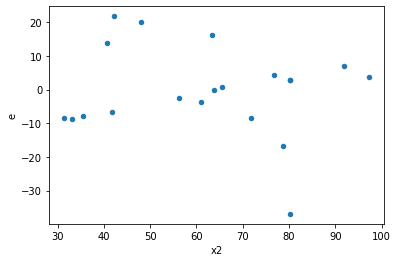

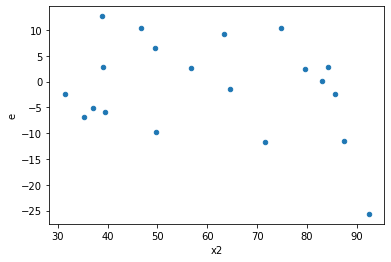

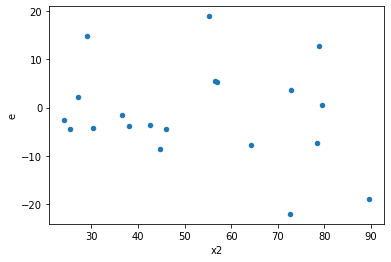

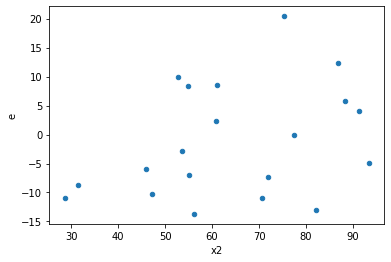

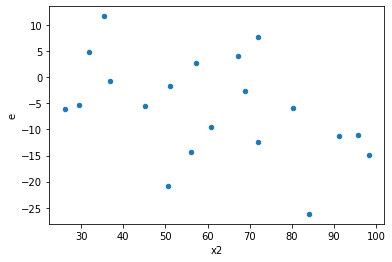

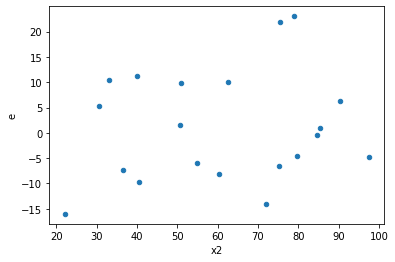

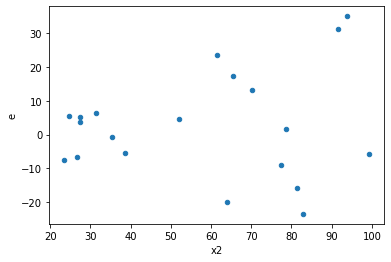

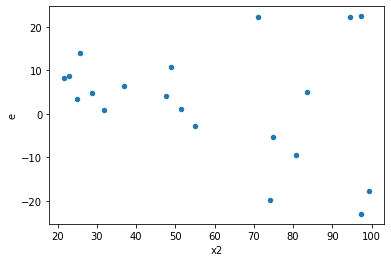

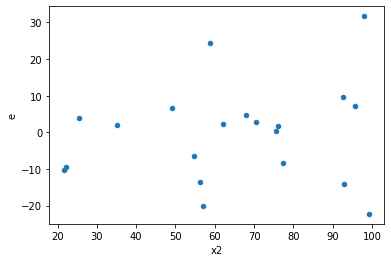

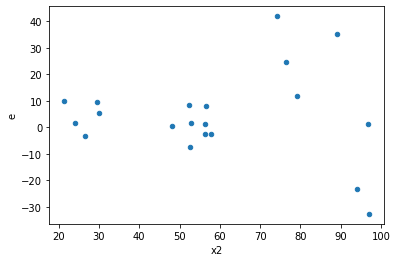

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,4.0,4.0,190.78320799585936,249.9157827457447,47.69580199896484,62.47894568643618,1.3099464327655541,0.7999392964996235,0.6000303517501883,0.39996964824981174,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,71.7517081150993,487.47710290726275,17.937927028774826,121.86927572681569,6.793944223951916,0.09032397496000777,0.9548380125199961,0.045161987480003885,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,10.60141595817367,285.02851200281236,2.6503539895434174,71.25712800070309,26.885890821315805,0.0075313602945326075,0.9962343198527337,0.0037656801472663037,Reject001=0 : Heteroscedasticity
6.0,4.0,4.0,139.03437904764303,2630.240523313535,34.75859476191076,657.5601308283838,18.917914700882925,0.014617682862599679,0.9926911585687002,0.0073088414312998395,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,39.40383901631932,1027.8789994636643,9.85095975407983,256.96974986591607,26.085757761774495,0.007977120501080126,0.9960114397494599,0.003988560250540063,Reject001=0 : Heteroscedasticity
8.0,4.0,4.0,306.2600294365383,1091.763345269753,76.56500735913457,272.94083631743825,3.5648247904840713,0.24588858260081148,0.8770557086995943,0.12294429130040574,Reject001=1 : Homoscedasticity
9.0,4.0,4.0,98.29959092920393,1522.0265309171402,24.574897732300983,380.50663272928506,15.48354898051727,0.021189463692762978,0.9894052681536185,0.010594731846381489,Reject001=1 : Homoscedasticity
11.0,4.0,4.0,153.0140997879618,474.34951565921415,38.25352494699045,118.58737891480354,3.1000379462843006,0.2988879399769253,0.8505560300115373,0.14944396998846265,Reject001=1 : Homoscedasticity
12.0,4.0,4.0,93.84939511812055,544.1007523623967,23.46234877953014,136.0251880905992,5.7975946640634355,0.11711477088280309,0.9414426145585985,0.058557385441401544,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,628.5146675136119,504.52267096578305,157.12866687840298,126.13066774144576,0.8027221909739385,0.8365053413941007,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,190.78320799585936,249.9157827457447,47.69580199896484,62.47894568643618,1.3099464327655541,0.7999392964996235,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,71.7517081150993,487.47710290726275,17.937927028774826,121.86927572681569,6.793944223951916,0.09032397496000777,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,10.60141595817367,285.02851200281236,2.6503539895434174,71.25712800070309,26.885890821315805,0.0075313602945326075,Reject001=0 : Heteroscedasticity
4.0,4.0,4.0,201.49853490095506,117.50609261128938,50.374633725238766,29.376523152822344,0.5831610272950546,0.6141833448508391,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,431.46342662653257,383.7844895773108,107.86585665663314,95.9461223943277,0.8894948352354977,0.9123740591914332,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,139.03437904764303,2630.240523313535,34.75859476191076,657.5601308283838,18.917914700882925,0.014617682862599679,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,39.40383901631932,1027.8789994636643,9.85095975407983,256.96974986591607,26.085757761774495,0.007977120501080126,Reject001=0 : Heteroscedasticity
8.0,4.0,4.0,306.2600294365383,1091.763345269753,76.56500735913457,272.94083631743825,3.5648247904840713,0.24588858260081148,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      949
Reject001=0 : Heteroscedasticity     51
Name: Result_test, dtype: int64